## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on=["Mouse ID"], how="left")

# Display the data table for preview
display(combined_df)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:

combined_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [3]:
#combined_df.describe()

In [4]:
#combined_df.info()

In [5]:
# Checking the number of mice.
mice_count=combined_df['Mouse ID'].value_counts()
len(mice_count)


249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_ids= combined_df.loc[combined_df.duplicated(keep='first'), :]
duplicated_ids

# duplicated_ids = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
# duplicated_ids

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
ids = combined_df.loc[combined_df["Mouse ID"] == "g989"]
#len(ids)
ids


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# clean_df  = combined_df.drop_duplicates( keep="last")
clean_df = combined_df[combined_df['Mouse ID'].isin(duplicated_ids)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

249

In [10]:
#veryfy if the duplicates have been removed
clean_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

## Summary Statistics

In [11]:
display(clean_df)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
average=clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
#average.round(3)
median=clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
#median.round(3)
variance=clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
#variance.round(3)
std_dev=clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
#std_dev.round(3)
sems=clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
#sems.round(3)

summary_table = pd.DataFrame({"Mean Tumor Volume":average,
                              "Median Tumor Volume":median,
                              "Tumor Volume Variance":variance,
                              "Tumor Volume Std. Dev.":std_dev,
                              "Tumor Volume Std. Err.":sems})
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drugs_regimen = pd.DataFrame(pd.value_counts(clean_df["Drug Regimen"]))
drugs_regimen


,Drug Regimen
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Stelasyn,181
Placebo,181
Ceftamin,178
Infubinol,178
Propriva,161


## Bar and Pie Charts

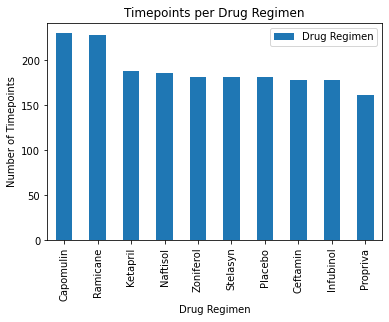

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drugs_regimen.plot(kind="bar")
plt.title("Timepoints per Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xlabel("Drug Regimen")
plt.show()
plt.tight_layout()

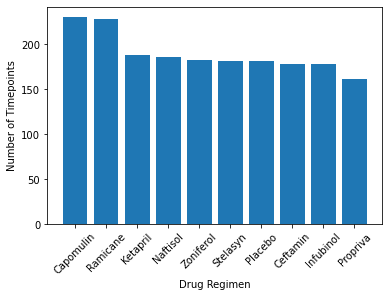

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = clean_df["Drug Regimen"].value_counts().index
y_axis = clean_df["Drug Regimen"].value_counts()
plt.bar(x_axis, y_axis)
plt.xticks(rotation=45)
plt.ylabel("Number of Timepoints")
plt.xlabel("Drug Regimen")
plt.show()

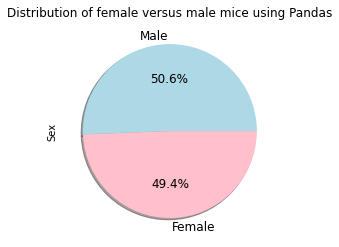

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_count_pd = clean_df.Sex.value_counts()
gender_count_pd.plot(kind="pie",autopct='%1.1f%%',shadow=True, fontsize=12, colors =["lightblue","pink"],legend =False, title="Distribution of female versus male mice using Pandas")
plt.show()


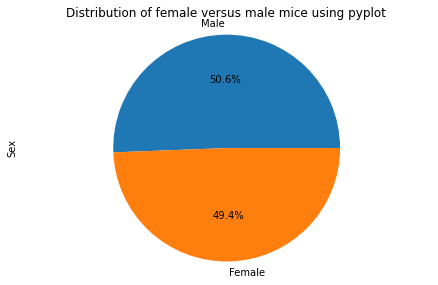

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_count = pd.value_counts(clean_df['Sex'])
gender_count_plt = gender_count.plot(kind="pie", y="sex", autopct='%1.1f%%')
gender_count_plt.set_ylabel("Sex")
plt.title("Distribution of female versus male mice using pyplot")
plt.tight_layout()
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumor=clean_df.groupby(['Mouse ID'])['Timepoint'].max()
final_tumor= final_tumor.reset_index()


display(final_tumor)


,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
244,z435,10
245,z578,45
246,z581,45
247,z795,45


In [19]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_df=final_tumor.merge(clean_df, on=['Mouse ID','Timepoint'],how="left")

In [20]:
display(new_df)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]
counter = 0
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = new_df.loc[new_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol.append(final_tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_volume.quantile([.25,.5,.75]).round(2)
    first_q = quartiles[0.25].round(2)
    last_q = quartiles[0.75].round(2)
    inter_q = round(first_q-last_q,2)
    lower_bound = round(first_q - (1.5*inter_q),2)
    upper_bound = round(last_q + (1.5*inter_q),2)

    if counter == 0:
        print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {first_q}")
    print(f"The upper quartile of {drug} is: {last_q}")
    print(f"The interquartile range of {drug} is: {inter_q}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")
    counter += 1

    

--------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: -7.78
The the median of Capomulin is: 38.13 
Values below 44.05 for Capomulin could be outliers.
Values above 28.49 for Capomulin could be outliers.
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: -9.1
The the median of Ramicane is: 36.56 
Values below 45.21 for Ramicane could be outliers.
Values above 27.01 for Ramicane could be outliers.
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: -11.48
The the median of Infubinol is: 60.17 
Values below 71.27 for Infubinol could be outlier

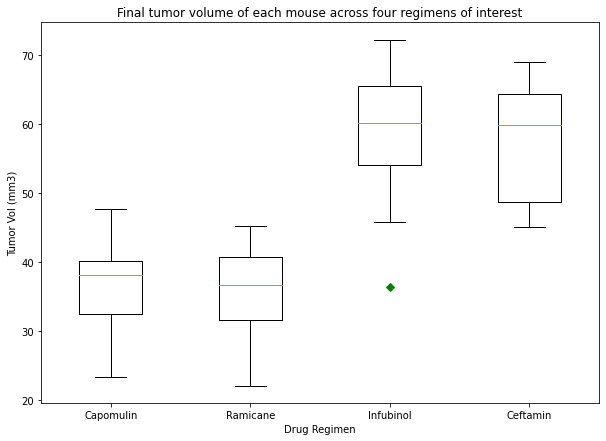

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax = plt.subplots(figsize=(10,7))
ax.set_title('Final tumor volume of each mouse across four regimens of interest')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
ax.boxplot(tumor_vol,notch=0,sym='gD')
plt.xticks([1,2,3,4],drug_list)

plt.show()

## Line and Scatter Plots

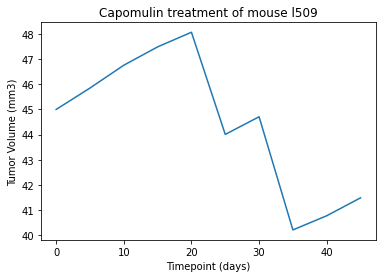

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


capomulin_treatment = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin"]
mouse_treatment = capomulin_treatment.loc[capomulin_treatment['Mouse ID']== 'l509']
plt.plot(mouse_treatment['Timepoint'],mouse_treatment['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

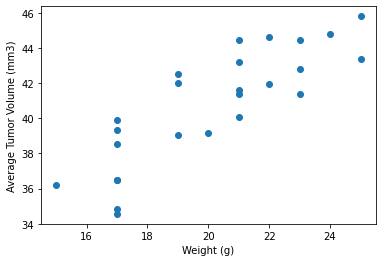

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_treatment = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin"]
capomulin_mean= capomulin_treatment.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_mean['Weight (g)'],capomulin_mean['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation_coefficient=round(st.pearsonr(capomulin_mean['Weight (g)'],capomulin_mean['Tumor Volume (mm3)'])[0],2)
regression_model = st.linregress(capomulin_mean['Weight (g)'],capomulin_mean['Tumor Volume (mm3)'])

y_values = capomulin_mean['Weight (g)']*regression_model[0]+regression_model[1]
plt.scatter(capomulin_mean['Weight (g)'],capomulin_mean['Tumor Volume (mm3)'])
plt.plot(capomulin_mean['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient}")